<a href="https://colab.research.google.com/github/Nikkuchan/BleepBot/blob/main/UnnathiBased2cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.metrics import classification_report
from keras import layers, models, optimizers
import sklearn.metrics as metrics
from sklearn.feature_extraction import text 
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
#just for word wrap purposes :)
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
speech_data = pd.read_csv('/content/profanity_clean1k.csv')

# split the dataset into training and testing datasets 
x_train, x_test, y_train, y_test = train_test_split(speech_data['Transcript'], speech_data['Category'], test_size=0.3, random_state=1)


# create a count vectorizer object 
my_additional_stop_words = ["akin","ako","mo","ka","tayo","ikaw","alin","amin",
                 "ay","bababa","dapat","ginawa","ginawang","bawat","ano",
                 "dahil","bilang","tama","na","nga","using","si","pati","ang",
                 "hala","pre","nag","edi","punta","pinupuntahan","lang","sa",
                 "mali","-","q","mong","date","busog","kayo","kayong","buka",
                 "ibubuka","nais","try","yung","katropa","gaya","ng","pic","bang",
                 "wala","pakita","computer","ambag","dito","nabawasan","bawas",
                 "footballer", "napaka","sayo","balota","bida","pietro","jett",
                 "mag-text","para","may","hindi","ni","ba","dalawa","salba","tutok",
                 "shadow", "install","ballaran","ito","mga","nalang","noh","baka",
                 "samin","mag","nasa","pa","masa","ata","po","ita","ga","kasi","eh",
                 "ol","nang","kang","naman","ko","tae","ata","atang","sana","kung","di",
                 "ah","much","pag","ni","pagiging","ha","mo","kasi","lulugar","nila",
                 "don","ngang","tong","hi","niyo","nating","kayong"]

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
cv = CountVectorizer(stop_words='english')
cv.fit(speech_data['Transcript'])

# transform the training and testing data using count vectorizer object
x_train_count =  cv.transform(x_train)
x_test_count =  cv.transform(x_test)

tfidf_tr = TfidfTransformer()
x_train_count_tfidf = tfidf_tr.fit_transform(x_train_count)
x_test_count_tfidf = tfidf_tr.transform(x_test_count)

# ngram level tf-idf 
tv_ngram = TfidfVectorizer(ngram_range=(1,2))
tv_ngram.fit(speech_data['Transcript'])
x_train_tfidf_ngram =  tv_ngram.transform(x_train)
x_test_tfidf_ngram =  tv_ngram.transform(x_test)

In [ ]:
print(x_train_count_tfidf)

In [ ]:
print(cv.vocabulary_)

In [3]:
# encode document
vector = cv.transform(speech_data['Transcript'])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1000, 1300)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
speech_data['Category'].value_counts()

not          500
profanity    500
Name: Category, dtype: int64

In [5]:
def classifierModel(classifier, Xtrain, Ytrain, Xtest):
    classifier.fit(Xtrain, Ytrain)
    predictions = classifier.predict(Xtest)
    print("\nAccuracy     : ", accuracy_score(predictions, y_test), 
          "\nRecall Score : ", recall_score(predictions, y_test, average='weighted'),
          "\nF1 score     : ", f1_score(predictions, y_test, average='weighted'),
          "\nPrecision    : ", precision_score(predictions, y_test, average='weighted'))
    
    target_names = ['profanity', 'not']
    print(classification_report(y_test, predictions, target_names=target_names))

In [6]:
print("\nNaive Bayes with Count Vectors: ")
classifierModel(MultinomialNB(), x_train_count, y_train, x_test_count)

print("\nNaive Bayes with Count Vectors + TF-IDF: ")
classifierModel(MultinomialNB(), x_train_count_tfidf, y_train, x_test_count_tfidf)

print("\nNaive Bayes with N-Gram Vectors: ")
classifierModel(MultinomialNB(), x_train_tfidf_ngram, y_train, x_test_tfidf_ngram)


Naive Bayes with Count Vectors: 

Accuracy     :  0.8733333333333333 
Recall Score :  0.8733333333333333 
F1 score     :  0.8757382509689922 
Precision    :  0.9060770975056691
              precision    recall  f1-score   support

   profanity       1.00      0.74      0.85       147
         not       0.80      1.00      0.89       153

    accuracy                           0.87       300
   macro avg       0.90      0.87      0.87       300
weighted avg       0.90      0.87      0.87       300


Naive Bayes with Count Vectors + TF-IDF: 

Accuracy     :  0.8866666666666667 
Recall Score :  0.8866666666666667 
F1 score     :  0.8884102564102564 
Precision    :  0.9128798185941044
              precision    recall  f1-score   support

   profanity       1.00      0.77      0.87       147
         not       0.82      1.00      0.90       153

    accuracy                           0.89       300
   macro avg       0.91      0.88      0.88       300
weighted avg       0.91      0.89   

In [ ]:
# pickle.dump(MultinomialNB(), open("multiNB.pkl"))

In [11]:
print("\nLinearSVM with Count Vectors: ")
classifierModel(SVC(kernel='linear'), x_train_count, y_train, x_test_count)

print("\nLinearSVM with Count Vectors + TF-IDF: ")
classifierModel(SVC(kernel='linear'), x_train_count_tfidf, y_train, x_test_count_tfidf)

print("\nLinearSVM with N-Gram Vectors: ")
classifierModel(SVC(kernel='linear'), x_train_tfidf_ngram, y_train, x_test_tfidf_ngram)


LinearSVM with Count Vectors: 

Accuracy     :  0.9866666666666667 
Recall Score :  0.9866666666666667 
F1 score     :  0.9866666666666667 
Precision    :  0.9866666666666667
              precision    recall  f1-score   support

   profanity       0.99      0.99      0.99       147
         not       0.99      0.99      0.99       153

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


LinearSVM with Count Vectors + TF-IDF: 

Accuracy     :  0.98 
Recall Score :  0.98 
F1 score     :  0.9799982221432064 
Precision    :  0.9803450268996489
              precision    recall  f1-score   support

   profanity       0.97      0.99      0.98       147
         not       0.99      0.97      0.98       153

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


LinearSVM wi

In [12]:
print("\nRandom Forrest Classifier with Count Vectors: ")
classifierModel(RandomForestClassifier(random_state=40,n_estimators=1024), x_train_count, y_train, x_test_count)

print("\nRandom Forrest Classifier with Count Vectors + TF-IDF: ")
classifierModel(RandomForestClassifier(random_state=40,n_estimators=1024), x_train_count_tfidf, y_train, x_test_count_tfidf)

print("\nRandom Forrest Classifier with N-Gram Vectors: ")
classifierModel(RandomForestClassifier(random_state=40,n_estimators=1024), x_train_tfidf_ngram, y_train, x_test_tfidf_ngram)


Random Forrest Classifier with Count Vectors: 

Accuracy     :  0.96 
Recall Score :  0.96 
F1 score     :  0.96 
Precision    :  0.96
              precision    recall  f1-score   support

   profanity       0.96      0.96      0.96       147
         not       0.96      0.96      0.96       153

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


Random Forrest Classifier with Count Vectors + TF-IDF: 

Accuracy     :  0.9533333333333334 
Recall Score :  0.9533333333333334 
F1 score     :  0.9533333333333334 
Precision    :  0.9533333333333334
              precision    recall  f1-score   support

   profanity       0.95      0.95      0.95       147
         not       0.95      0.95      0.95       153

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


Random F

In [9]:
def avg(arr):
    a = arr[0]
    b = arr[1]
    c = arr[2]
    average = (a+b+c)/3
    return average

Average NB:  0.8844
Average LSVM:  0.9777999999999999
Average RF:  0.9533333333333333


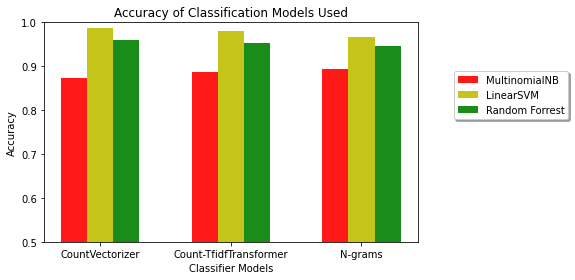

In [17]:
#Accuracy
Models = ['MultinomialNB', 'LinearSVM', 'Random Forrest']

NB_2_acc = [0.8733,0.8866,0.8933]
LSVM_2_acc = [0.9867,0.98,0.9667]
RF_2_acc = [0.96,0.9533,0.9467]

print("Average NB: ",avg(NB_2_acc))
print("Average LSVM: ",avg(LSVM_2_acc))
print("Average RF: ",avg(RF_2_acc))

n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.9
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, NB_2_acc, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label=Models[0])

rects2 = ax.bar(index + bar_width, LSVM_2_acc, bar_width,
                alpha=opacity, color='y',
                error_kw=error_config,
                label=Models[1])

rects3 = ax.bar(index + (bar_width*2), RF_2_acc, bar_width,
                alpha=opacity, color='g',
                error_kw=error_config,
                label=Models[2])

ax.set_xlabel('Classifier Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Classification Models Used')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('CountVectorizer', 'Count-TfidfTransformer', 'N-grams'))
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
plt.ylim(0.5, 1.0)
fig.tight_layout()
plt.show()


In [10]:
#precision
NB_2_p = [0.9061,0.9129,0.9166]
LSVM_2_p = [0.9867,0.9803,0.9667]
RF_2_p = [ 0.9600,0.9533,0.9468]

print("Average Recall NB: ",avg(NB_2_p))
print("Average Recall LSVM: ",avg(LSVM_2_p))
print("Average Recall RF: ",avg(RF_2_p))


Average Recall NB:  0.9118666666666666
Average Recall LSVM:  0.9779
Average Recall RF:  0.9533666666666667


In [13]:
#Recall Score
NB_2_rec = [0.8733,0.8866,0.8933]
LSVM_2_rec = [0.9867,0.9800,0.9667]
RF_2_rec = [0.96,0.9533,0.9466]

print("Average Recall NB: ",avg(NB_2_rec))
print("Average Recall LSVM: ",avg(LSVM_2_rec))
print("Average Recall RF: ",avg(RF_2_rec))


Average Recall NB:  0.8844
Average Recall LSVM:  0.9777999999999999
Average Recall RF:  0.9533


In [14]:
#f1 Score
NB_2_f1 = [0.9468,0.8926,0.9202]
LSVM_2_f1 = [0.9665,0.9799,0.9736]
RF_2_f1 = [0.9670,0.9669,0.9737]

print("Average Recall NB: ",avg(NB_2_f1))
print("Average Recall LSVM: ",avg(LSVM_2_f1))
print("Average Recall RF: ",avg(RF_2_f1))


Average Recall NB:  0.9198666666666666
Average Recall LSVM:  0.9733333333333333
Average Recall RF:  0.9692


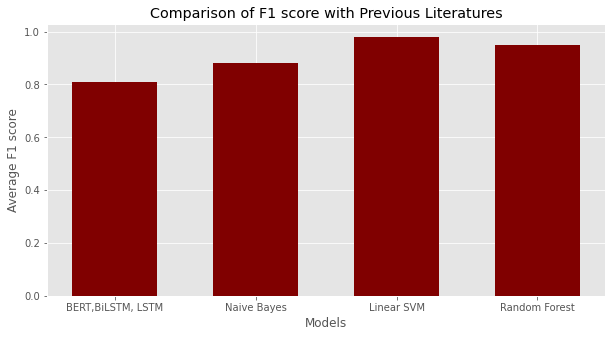

In [36]:
data = {'BERT,BiLSTM, LSTM':0.81, 'Naive Bayes':0.88, 'Linear SVM':0.98,
		'Random Forest':0.95}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.6)

plt.xlabel("Models")
plt.ylabel("Average F1 score")
plt.title("Comparison of F1 score with Previous Literatures")
plt.show()
